# Initiailize VW executor

In [1]:
from vw_pipeline.vw import Vw

vw = Vw('vw', '.vw_cache')

# Get the data

In [ ]:
inputs = [
    #'file1.json',
    #'file2.json',
    ]
inputs

In [2]:
inputs = [
    '/Users/alextaim/data/ccb/raw/01.json',
    '/Users/alextaim/data/ccb/raw/02.json',
    ]
inputs

['/Users/alextaim/data/ccb/raw/01.json',
 '/Users/alextaim/data/ccb/raw/02.json']

# Define options grid and train

In [3]:
from vw_pipeline.vw_opts import dimension, product
import pandas as pd

opts = pd.DataFrame(product(
    dimension('#base', ['--ccb_explore_adf -P 100 --preserve_performance_counters --save_resume --dsjson']),
    dimension('--cb_type', ['ips', 'mtr']),
))
opts

,#base,--cb_type
0,--ccb_explore_adf -P 100 --preserve_performanc...,ips
1,--ccb_explore_adf -P 100 --preserve_performanc...,mtr


In [4]:
result = vw.train(inputs, opts)
result

,#base,--cb_type,!Loss,!Outputs,!Metrics,!FinalMetrics,!Job
0,--ccb_explore_adf -P 100 --preserve_performanc...,ips,-0.138613,{'-f': ['.vw_cache/cache-f/13ea6840de9173668f5...,loss_per_example since_last file n...,[{'final_regressor': '.vw_cache/cache-f/13ea68...,<vw_pipeline.vw.TrainJob object at 0x7f8a572e2...
1,--ccb_explore_adf -P 100 --preserve_performanc...,mtr,-0.152044,{'-f': ['.vw_cache/cache-f/2d4b763cb02d6e774e7...,loss_per_example since_last file n...,[{'final_regressor': '.vw_cache/cache-f/2d4b76...,<vw_pipeline.vw.TrainJob object at 0x7f8a572e2...


# Explore metrics


In [5]:
result.iloc[0]['!Metrics'].head()

loss_per_example  since_last
file n                                
0    100         -0.065133   -0.065133
     200         -0.119531   -0.173929
     300         -0.144449   -0.194286
     400         -0.129200   -0.083452
     500         -0.113265   -0.049524

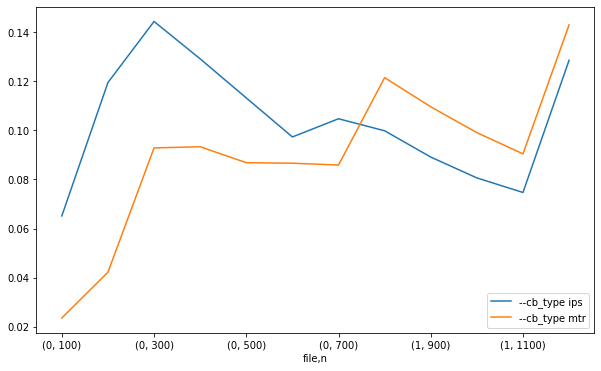

In [6]:
import matplotlib.pyplot as plt
[(-r['!Metrics']['loss_per_example']).plot(label=f"{r['!Job'].name}", figsize=(10,6)) for i, r in result[result['!Loss'].notnull()].iterrows()]
plt.legend()

# Choose the best and try other options on top

In [7]:
best1 = result.sort_values(by='!Loss').head(1)
best1

,#base,--cb_type,!Loss,!Outputs,!Metrics,!FinalMetrics,!Job
1,--ccb_explore_adf -P 100 --preserve_performanc...,mtr,-0.152044,{'-f': ['.vw_cache/cache-f/2d4b763cb02d6e774e7...,loss_per_example since_last file n...,[{'final_regressor': '.vw_cache/cache-f/2d4b76...,<vw_pipeline.vw.TrainJob object at 0x7f8a572e2...


In [8]:
opts = pd.DataFrame(product(best1, 
    dimension('-l', ['0.1', '0.2'])))
opts

,#base,--cb_type,-l
0,--ccb_explore_adf -P 100 --preserve_performanc...,mtr,0.1
1,--ccb_explore_adf -P 100 --preserve_performanc...,mtr,0.2


In [9]:
result = vw.train(inputs, opts)
result

,#base,--cb_type,-l,!Loss,!Outputs,!Metrics,!FinalMetrics,!Job
0,--ccb_explore_adf -P 100 --preserve_performanc...,mtr,0.1,-0.177469,{'-f': ['.vw_cache/cache-f/93c37d6d2b1070b277d...,loss_per_example since_last file n...,[{'final_regressor': '.vw_cache/cache-f/93c37d...,<vw_pipeline.vw.TrainJob object at 0x7f8a585e0...
1,--ccb_explore_adf -P 100 --preserve_performanc...,mtr,0.2,-0.180976,{'-f': ['.vw_cache/cache-f/657d164eda4cbe30202...,loss_per_example since_last file n...,[{'final_regressor': '.vw_cache/cache-f/657d16...,<vw_pipeline.vw.TrainJob object at 0x7f8a585e0...
